In [2]:
#importing required libraries for Tesseract 
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

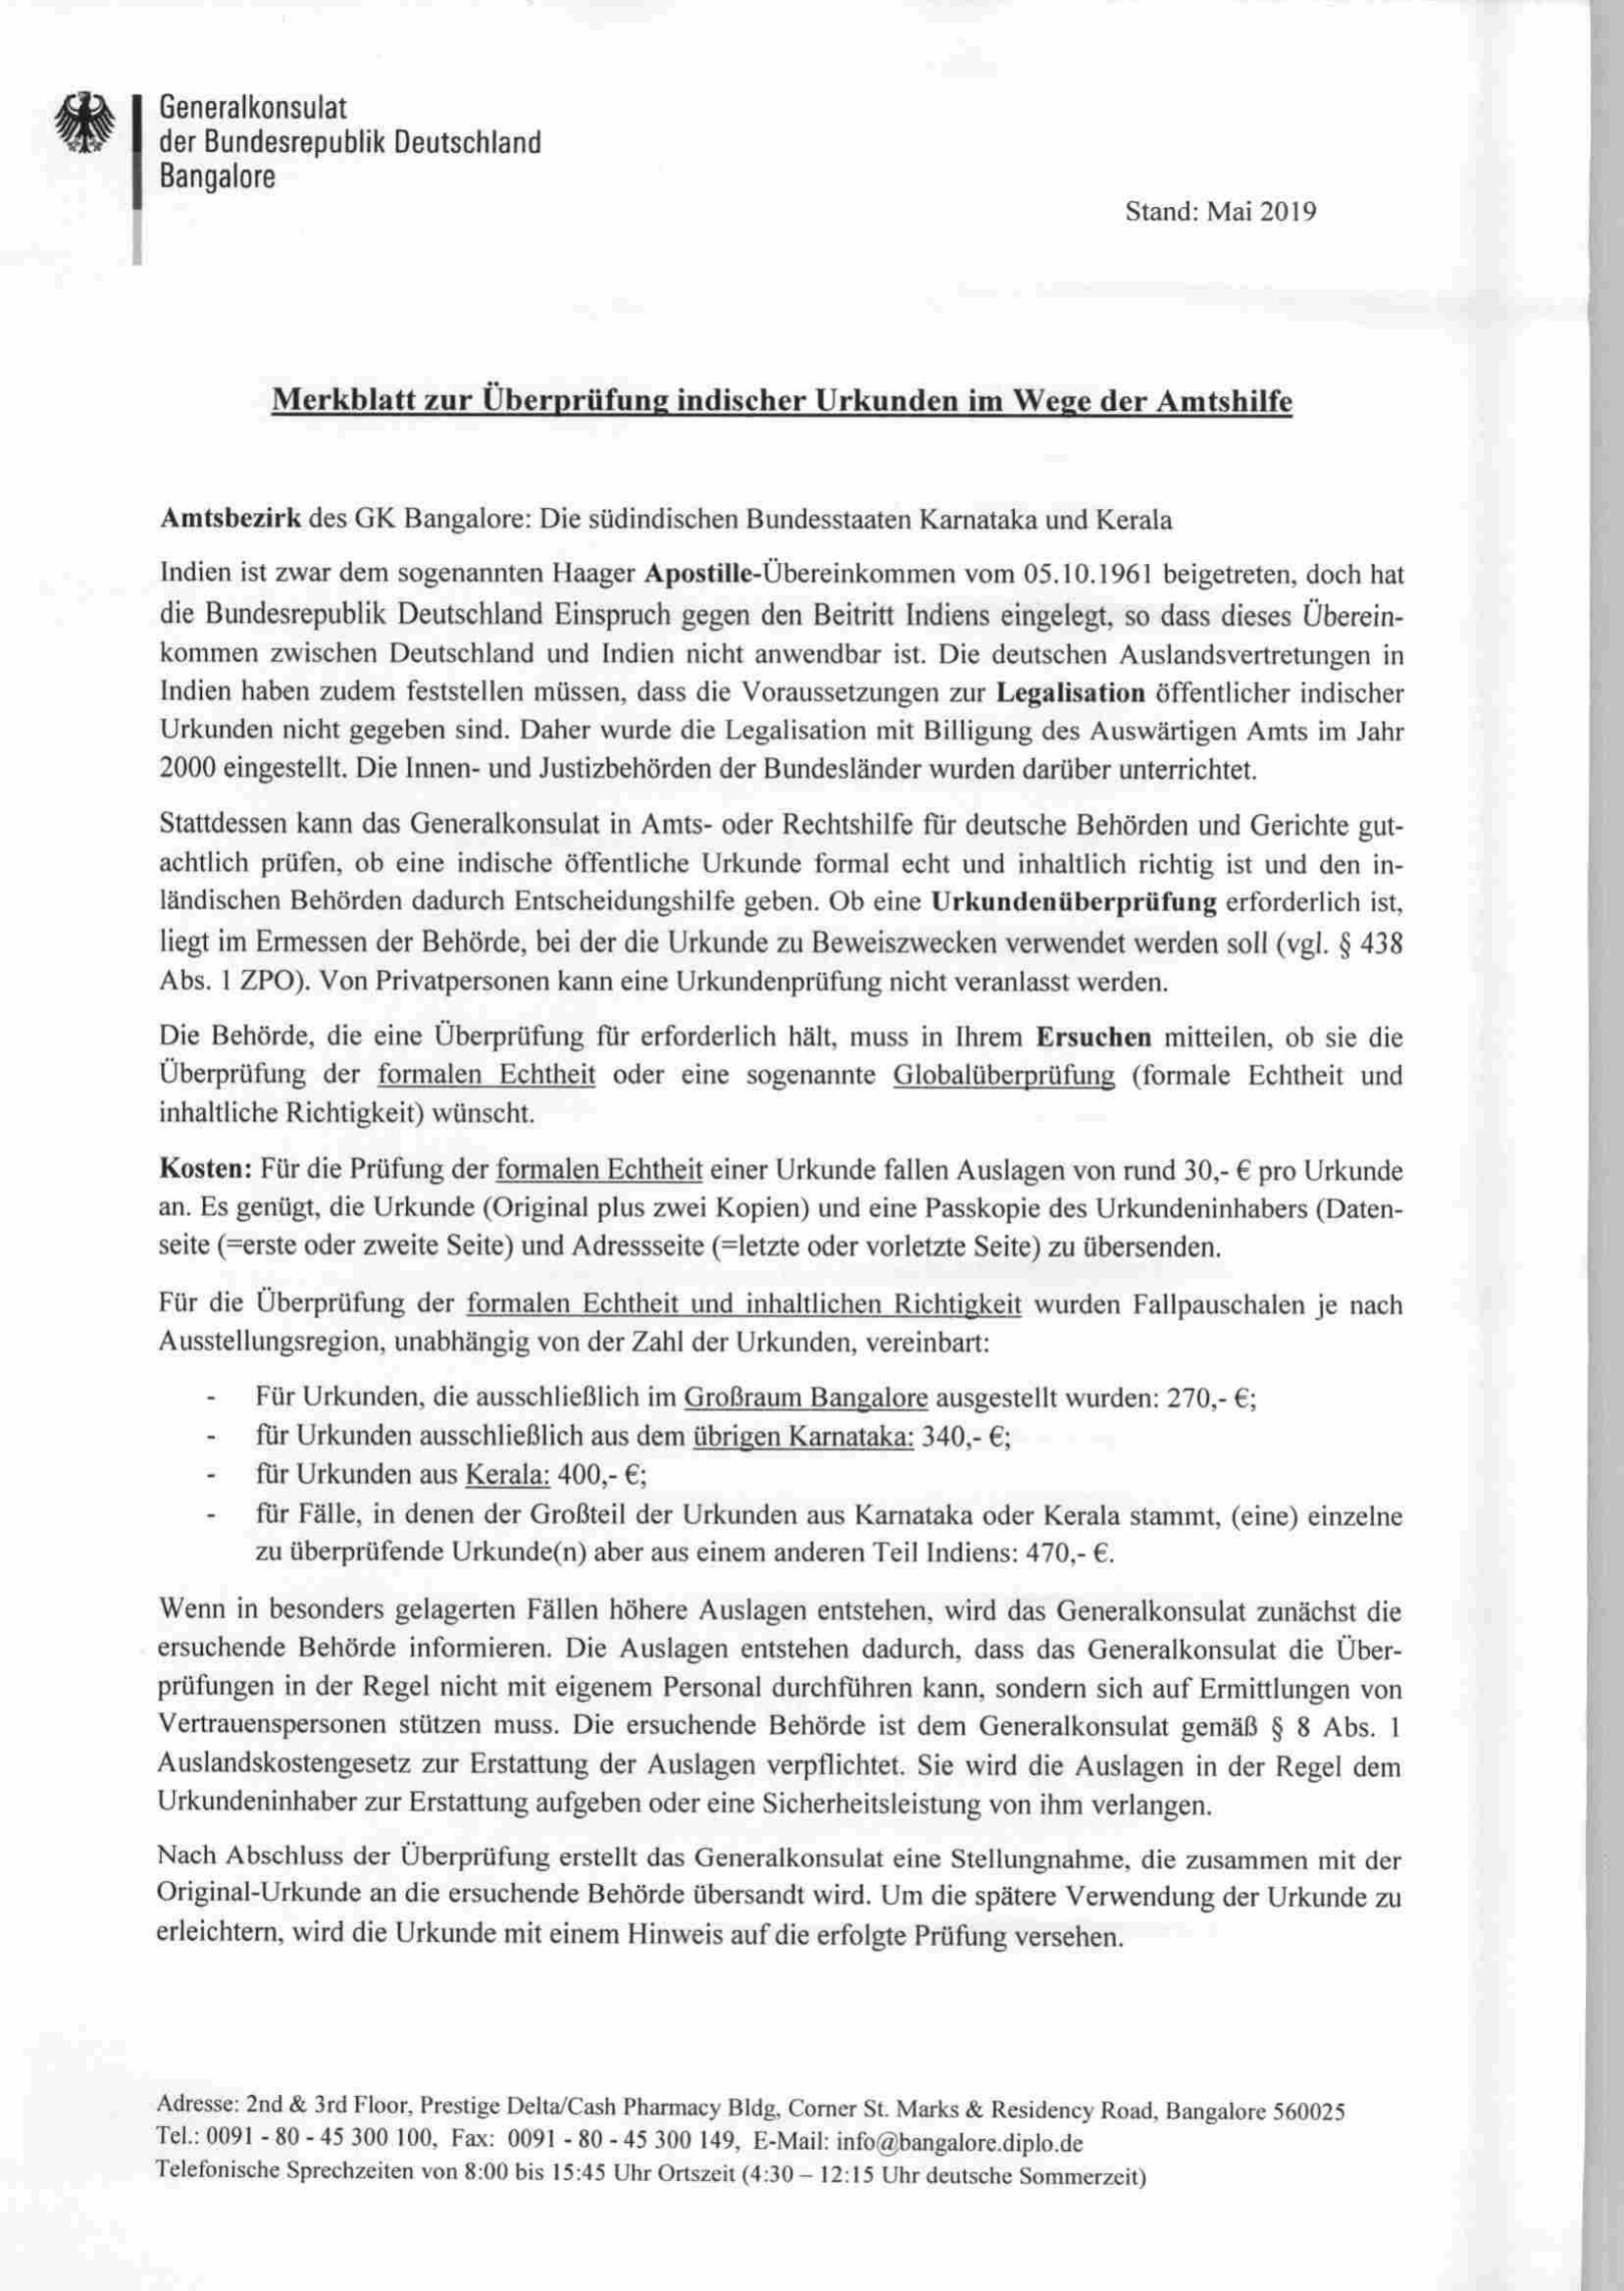

In [5]:
#define image path and view image
directory = 'ImageDataFolder/'
impath = directory+'legalisierung-bangalore-data0.png'
im = Image.open(impath) #provide your image path
im

## Image Preprocessing Block

In [6]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [7]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

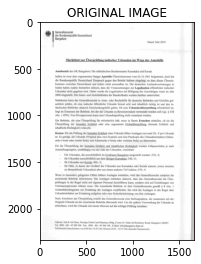

In [8]:
# Plot original image

image = cv2.imread(impath)
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [9]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

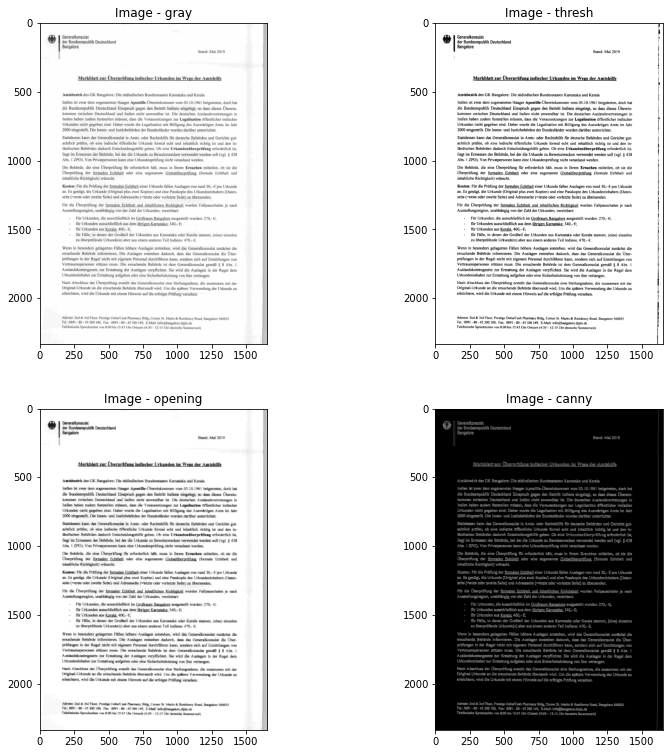

In [10]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('Image - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

### Sharpening the image

In [12]:
from PIL import Image

image = Image.open(impath)

image.show()

In [13]:
from PIL import Image, ImageEnhance

In [14]:
image.size

(1656, 2336)

In [16]:
#customise according to the chosen preprocessingg technique

#name the image after impath below according to the chosen preprocessing 
prepro_path = impath+'thresh.jpg'

#replace the thresh parameter value according to chosen preprocessing
cv2.imwrite(prepro_path, thresh)

True

In [17]:
#saving the threshold image to image variable

from PIL import Image

#change path
image = Image.open(thresh_path)

image.show()

In [25]:
#run and extract information from image

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
extractedInformation = pytesseract.image_to_string(Image.open(impath))
print(extractedInformation)

*|

Generalkonsulat
der Bundesrepublik Deutschland
Bangalore
Stand: Mai 2019

Merkblatt zur Uberpriifung indischer Urkunden im Wege der Amtshilfe

Amtsbezirk des GK Bangalore: Die siidindischen Bundesstaaten Karnataka und Kerala

Indien ist zwar dem sogenannten Haager Apostille-Ubereinkommen vom 05.10.1961 beigetreten, doch hat
die Bundesrepublik Deutschland Einspruch gegen den Beitritt Indiens eingelegt, so dass dieses Uberein-
kommen zwischen Deutschland und Indien nicht anwendbar ist. Die deutschen Auslandsvertretungen in
Indien haben zudem feststellen miissen, dass die Voraussetzungen zur Legalisation 6ffentlicher indischer
Urkunden nicht gegeben sind. Daher wurde die Legalisation mit Billigung des Auswartigen Amts im Jahr
2000 eingestellt. Die Innen- und Justizbehérden der Bundeslander wurden dariiber unterrichtet.

Stattdessen kann das Generalkonsulat in Amts- oder Rechtshilfe fiir deutsche Behérden und Gerichte gut-
achtlich priifen, ob eine indische 6ffentliche Urkunde formal e

In [26]:
def view_all_preprocessing_outputs(decision):
    # Get OCR output using Pytesseract

    if decision == "yes":
        custom_config = r'--oem 3 --psm 6'
        print('-----------------------------------------')
        print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
        print('-----------------------------------------')
        print(pytesseract.image_to_string(image, config=custom_config))
        print('\n-----------------------------------------')
        print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
        print('-----------------------------------------')
        print(pytesseract.image_to_string(image, config=custom_config))
        print('\n-----------------------------------------')
        print('TESSERACT OUTPUT --> OPENED IMAGE')
        print('-----------------------------------------')
        print(pytesseract.image_to_string(image, config=custom_config))
        print('\n-----------------------------------------')
        print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
        print('-----------------------------------------')
        print(pytesseract.image_to_string(image, config=custom_config))

In [28]:
#change to "yes" if you want to view all outputs
decision = "yes"
view_all_preprocessing_outputs(decision)

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
F
ae Generalkonsulat i
der Bundesrepublik Deutschland
Bangalore
Stand: Mai 2019
j
'
|
Merkblatt zur Uberpriifung indischer Urkunden im Wege der Amtshilfe
Amtsbezirk des GK Bangalore: Die siidindischen Bundesstaaten Karnataka und Kerala
Indien ist zwar dem sogenannten Haager Apostille-Ubereinkommen vom 05.10.1961 beigetreten, doch hat
die Bundesrepublik Deutschland Einspruch gegen den Beitritt Indiens eingelegt, so dass dieses Uberein-
kommen zwischen Deutschland und Indien nicht anwendbar ist. Die deutschen Auslandsvertretungen in
Indien haben zudem feststellen miissen, dass die Voraussetzungen zur Legalisation Sffentlicher indischer
Urkunden nicht gegeben sind. Daher wurde die Legalisation mit Billigung des Auswartigen Amts im Jahr
2000 eingestellt. Die Innen- und Justizbehérden der Bundeslander wurden dariiber unterrichtet.
Stattdessen kann das Generalkonsulat in Am

F
ae Generalkonsulat i
der Bundesrepublik Deutschland
Bangalore
Stand: Mai 2019
j
'
|
Merkblatt zur Uberpriifung indischer Urkunden im Wege der Amtshilfe
Amtsbezirk des GK Bangalore: Die siidindischen Bundesstaaten Karnataka und Kerala
Indien ist zwar dem sogenannten Haager Apostille-Ubereinkommen vom 05.10.1961 beigetreten, doch hat
die Bundesrepublik Deutschland Einspruch gegen den Beitritt Indiens eingelegt, so dass dieses Uberein-
kommen zwischen Deutschland und Indien nicht anwendbar ist. Die deutschen Auslandsvertretungen in
Indien haben zudem feststellen miissen, dass die Voraussetzungen zur Legalisation Sffentlicher indischer
Urkunden nicht gegeben sind. Daher wurde die Legalisation mit Billigung des Auswartigen Amts im Jahr
2000 eingestellt. Die Innen- und Justizbehérden der Bundeslander wurden dariiber unterrichtet.
Stattdessen kann das Generalkonsulat in Amts- oder Rechtshilfe fiir deutsche Behdrden und Gerichte gut-
achtlich prifen, ob eine indische 6ffentliche Urkunde form

In [29]:
# Get bounding box estimates
print(pytesseract.image_to_boxes(Image.open(impath)))

* 55 2179 118 2243 0
| 134 2121 145 2240 0
G 163 2215 178 2241 0
e 180 2215 192 2234 0
n 195 2215 206 2234 0
e 203 2215 214 2241 0
r 209 2215 221 2233 0
a 224 2215 244 2233 0
l 247 2215 251 2241 0
k 254 2215 266 2240 0
o 267 2215 279 2233 0
n 282 2215 294 2233 0
s 296 2215 307 2233 0
u 302 2215 317 2241 0
l 310 2215 329 2240 0
a 332 2215 344 2233 0
t 345 2215 354 2236 0
d 163 2180 175 2205 0
e 178 2180 190 2198 0
r 192 2181 200 2198 0
B 209 2180 223 2205 0
u 226 2180 238 2198 0
n 241 2181 253 2198 0
d 256 2180 268 2205 0
e 271 2180 283 2198 0
s 284 2180 295 2198 0
r 297 2180 306 2197 0
e 307 2180 319 2198 0
p 321 2174 333 2198 0
u 336 2180 348 2198 0
b 344 2174 358 2205 0
l 352 2180 371 2205 0
i 374 2180 378 2204 0
k 381 2180 392 2204 0
D 403 2180 418 2205 0
e 421 2179 433 2197 0
u 435 2180 448 2197 0
t 450 2180 458 2201 0
s 459 2180 471 2197 0
c 472 2180 484 2197 0
h 486 2180 499 2204 0
l 502 2180 506 2204 0
a 508 2179 520 2197 0
n 524 2180 536 2197 0
d 539 2179 551 2204 0
B 164 2145 

## Translation Block 

In [37]:
import torch
from torch.autograd import Variable
from easynmt import EasyNMT
model = EasyNMT('opus-mt')

NameError: name '_C' is not defined

In [ ]:
import tqdm
document = extractedInformation

print("Output:")
print(model.translate(document, target_lang='en'))

In [31]:
#Saving the tranlated text as a txt file
ouput_directory = "OutputText"
text_file = open(''+doc_name+"translated.txt", "w")
n = text_file.write(translated_text)
text_file.close()

NameError: name 'doc_name' is not defined